## Data Analysis Of Google App's Ratings

### Import all the necessary modules

In [1]:
import re
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data into DataFrame
* Show first 5 rows

In [2]:
df = pd.read_csv("data/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### DataFrame Info

In [3]:
# Summarize information of current dataset:

(rows, columns) = df.shape
print(f"There are {rows} rows in total in dataset.")
print(f"There are {columns} columns in total in dataset.")

There are 10840 rows in total in dataset.
There are 13 columns in total in dataset.


In [4]:
# Summarize dataset columns and Data type:

print("The general information about GoogleAppStore dataset is shown below:")
print("-"*68)
df.info()

The general information about GoogleAppStore dataset is shown below:
--------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


**As the information shown above, we can see there are several changes need to be made about Datatype.**
* Only 'Rating' is float, 'Reviews' are integer, and other columns are in string object. We need to convert the datatype of other columns to get meaningful results. And in this way, we can apply appropriate tools to visulize the results.
* But before converting datatype, let's do some `Data Cleaning` first.

### Clean Data 
#### Check and Remove NaN values

In [5]:
for i in range(len(df.isna().sum())):
    # Loop through all the number of columns in df:
    if df.isna().sum()[i] > 0:
        # Check if the sum of missing value in the i-th column > 0
        print('Total Number of missing values in '+ df.isna().sum().index[i] + ':',df.isna().sum()[i])

Total Number of missing values in Rating: 1474
Total Number of missing values in Type: 1
Total Number of missing values in Current Ver: 8
Total Number of missing values in Android Ver: 2


As we've found the number of NaN values, we can either replace or drop them. In current case, missing values are not big compared with dataset, so we just drop them.
If we choose to replace them, we can use `mean` or `mode` to do it. 

**There are 4 columns containing NaN values. We need to remove rows containing any NaN values by using `df.dropna()`.**

In [6]:
# Drop rows having NaN value:
df.dropna(axis = 0, inplace = True)

# axis = 0, meaning to drop rows

**Let's check if all the NaN values have been dropped.**

In [7]:
# df.isna().sum(): return the number of NaN in each column

df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
# df.isna().sum().sum(): return all the NaN values in DataFrame

print(f"Now there are {df.isna().sum().sum()} NaN values in total.")

Now there are 0 NaN values in total.


### Converting String to Categorical Dtype

#### 1. Category Column
* Here we will convert the values in Category column into categorical datatype and then do the univariate analysis by plotting the count of the top 10 Categories.

In [9]:
df["Category"] = df["Category"].astype('category')
df["Category"].dtype

CategoricalDtype(categories=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
                  'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
                  'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                  'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
                  'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
                  'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
                  'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
                  'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                  'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
, ordered=False)

In [10]:
# Find the top10 Category:

df["Category"].value_counts().nlargest(10)

FAMILY           1746
GAME             1097
TOOLS             733
PRODUCTIVITY      351
MEDICAL           350
COMMUNICATION     328
FINANCE           323
SPORTS            319
PHOTOGRAPHY       317
LIFESTYLE         314
Name: Category, dtype: int64

#### 2. Type Column

In [11]:
df["Type"] = df["Type"].astype("category")
df['Type'].dtype

CategoricalDtype(categories=['Free', 'Paid'], ordered=False)

In [12]:
# Find the count for those two types:

df['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

#### 3. Content Rating Column

In [13]:
df["Content Rating"] = df["Content Rating"].astype("category")
df["Content Rating"].dtype

CategoricalDtype(categories=['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
                  'Teen', 'Unrated'],
, ordered=False)

In [14]:
# Find the number for each of category:

df["Content Rating"].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Since it's said 'Unrated', Let's categorisize it as 'Everyone'.

In [15]:
df["Content Rating"].replace("Unrated","Everyone", inplace=True)

In [16]:
# Check the number for each of category again:

df["Content Rating"].value_counts()

Everyone           7415
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64

#### 4. Genres Column

In [17]:
df["Genres"] = df["Genres"].astype("category")
df["Genres"].dtype

CategoricalDtype(categories=['Action', 'Action;Action & Adventure', 'Adventure',
                  'Adventure;Action & Adventure', 'Adventure;Brain Games',
                  'Adventure;Education', 'Arcade', 'Arcade;Action & Adventure',
                  'Arcade;Pretend Play', 'Art & Design',
                  ...
                  'Tools', 'Tools;Education', 'Travel & Local',
                  'Travel & Local;Action & Adventure', 'Trivia',
                  'Video Players & Editors',
                  'Video Players & Editors;Creativity',
                  'Video Players & Editors;Music & Video', 'Weather', 'Word'],
, ordered=False)

In [18]:
# Find Top 10 Genres:

df["Genres"].value_counts().nlargest(10)

Tools            732
Entertainment    533
Education        468
Action           358
Productivity     351
Medical          350
Sports           333
Communication    328
Finance          323
Photography      317
Name: Genres, dtype: int64

### Converting String to Datetime Dtype

In [19]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], format = "%B %d, %Y")
df["Last Updated"].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

### Seperating Date Column
* Extract Year helps us understand the latest update

In [20]:
df["Year"] = df["Last Updated"].dt.year
df[["Year"]].head()

,Year
0,2018
1,2018
2,2018
3,2018
4,2018


### String to Numbers

#### 1. Price Column
* Price in current dataset is a string objct, to convert it float, we need to **remove the "$" sign first**.

In [21]:
# The regular expression'[\$]': to match the "$" in each value
# regex=True: indicate that the pattern used for replacement should be regular expression
# Using astype("float") to change string to float

df["Price"] = df["Price"].replace('[\$]','', regex=True).astype("float")

In [22]:
# All the Price is in dollars, let's convert it to UK currency

df[["Price"]].nlargest(10,["Price"])

,Price
4367,400.00
4197,399.99
4362,399.99
5351,399.99
5354,399.99
5356,399.99
5358,399.99
5359,399.99
5362,399.99
5364,399.99


In [23]:
# Create a new column: "Price in UK"
# 0.8 is the currency rate

df["Price in UK"] = df["Price"]*0.8
df[["Price in UK"]].nlargest(10,["Price in UK"])

,Price in UK
4367,320.000
4197,319.992
4362,319.992
5351,319.992
5354,319.992
5356,319.992
5358,319.992
5359,319.992
5362,319.992
5364,319.992


#### 2. Installs Column
* In this column, all the strings are followed by "+" sign.
* To convert Installs to an integer, we only need to **Extract digits**.

In [24]:
# x: represents each individual value in the column: "Installs"
# Using findall() retrieve string with 1 or more digits in the value x, and return them to a list

df["Installs"] = df["Installs"].apply(lambda x: re.findall(r"\d+", x))

In [25]:
# Using ''.join() to cnvert lists to strings

df["Installs"] = df["Installs"].apply(lambda x: ''.join(x))

In [26]:
# Convert datatype to int64

df["Installs"] = df["Installs"].astype("int64")

In [27]:
df["Installs"].dtype

dtype('int64')

In [28]:
# Check the results

df[["Installs"]].head()

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000


## Statistics

In [54]:
# Descriptive Statistic Summary:

df.describe().round(0)

,Rating,Reviews,Installs,Price,Year,Price in UK
count,9360.0,9360.0,9.360000e+03,9360.0,9360.0,9360.0
mean,4.0,514377.0,1.790875e+07,1.0,2017.0,1.0
std,1.0,3145023.0,9.126636e+07,16.0,1.0,13.0
min,1.0,1.0,1.000000e+00,0.0,2010.0,0.0
25%,4.0,187.0,1.000000e+04,0.0,2017.0,0.0
50%,4.0,5955.0,5.000000e+05,0.0,2018.0,0.0
75%,4.0,81628.0,5.000000e+06,0.0,2018.0,0.0
max,5.0,78158306.0,1.000000e+09,400.0,2018.0,320.0


### What's the average rating for 'Paid' and' Free' apps?

In [30]:
# Group data by 'Type' and calculate mean for each Type:

grouped_type = df.groupby("Type")["Rating"].mean()
grouped_type

Type
Free    4.186288
Paid    4.266822
Name: Rating, dtype: float64

In [31]:
# agg([]): Combine a list of functions

grouped_type = df.groupby("Type")["Rating"].agg(['min','max','mean'])
grouped_type

,min,max,mean
Type,,,
Free,1.0,5.0,4.186288
Paid,1.0,5.0,4.266822


We can see that the rating for Paid apps is slightly higher than Free apps. However, their minimum and maximum ratings are the same.

### Is app more expensive the higher rating?

In [32]:
# Create a list to show 'Price' and 'Rating'
# Show the most 15 expensive apps and thier Ratings

a = df[["Price in UK","Rating"]].nlargest(15,["Price in UK"])
a

,Price in UK,Rating
4367,320.000,3.6
4197,319.992,4.3
4362,319.992,3.8
5351,319.992,3.8
5354,319.992,4.0
5356,319.992,4.1
5358,319.992,3.8
5359,319.992,3.5
5362,319.992,4.4
5364,319.992,4.1


In [33]:
# Calculate the mean of the 15 most expensive rating:

a.mean()

Price in UK    313.059200
Rating           3.866667
dtype: float64

**The rating for those apps are lower than average, is it related to reviews and installs? Let's check.**

In [34]:
df[["Price in UK","Installs","Reviews","Rating"]].nlargest(15,"Price in UK")

,Price in UK,Installs,Reviews,Rating
4367,320.000,10000,275,3.6
4197,319.992,100,6,4.3
4362,319.992,10000,718,3.8
5351,319.992,100000,3547,3.8
5354,319.992,10000,856,4.0
5356,319.992,50000,1867,4.1
5358,319.992,1000,93,3.8
5359,319.992,5000,472,3.5
5362,319.992,5000,201,4.4
5364,319.992,1000,129,4.1


### Now let's check High Rating with Paid apps
* We filter apps with Rating equal or higher than 4.5

In [35]:
high_rating_paid = df[(df["Rating"] >= 4.5) & (df["Type"]=='Paid')]

# Filter Paid apps with highest Rating
high_rating_paid.head(10).sort_values("Rating", ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Price in UK
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63M,1000,Paid,3.99,Everyone,Education;Pretend Play,2017-07-24,1,4.0.3 and up,2017,3.192
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,3.992
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,3.992
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3.992
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3.992
852,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.7,21,44M,1000,Paid,5.99,Everyone,Education;Education,2017-07-21,1.3,4.1 and up,2017,4.792
853,Toca Life: City,EDUCATION,4.7,31085,24M,500000,Paid,3.99,Everyone,Education;Pretend Play,2018-07-06,1.5-play,4.4 and up,2018,3.192
854,Toca Life: Hospital,EDUCATION,4.7,3528,24M,100000,Paid,3.99,Everyone,Education;Pretend Play,2018-06-12,1.1.1-play,4.4 and up,2018,3.192
995,My Talking Pet,ENTERTAINMENT,4.6,6238,Varies with device,100000,Paid,4.99,Everyone,Entertainment,2018-06-30,Varies with device,Varies with device,2018,3.992
1001,Meme Generator,ENTERTAINMENT,4.6,3771,53M,100000,Paid,2.99,Mature 17+,Entertainment,2018-08-03,4.426,4.1 and up,2018,2.392


### Now let's check High Rating without Pay

In [36]:
high_rating_free = df[(df["Rating"] >= 4.5) & (df["Type"]=='Free')]

# Filter Paid apps with highest Rating
high_rating_free.head(10).sort_values("Rating", ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Price in UK
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,10000,Free,0.0,Everyone,Art & Design,2018-04-25,1.5,3.0 and up,2018,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,0.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up,2018,0.0
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,500000,Free,0.0,Everyone,Art & Design,2018-07-31,3.1,4.1 and up,2018,0.0
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,500000,Free,0.0,Everyone 10+,Art & Design,2018-07-12,2.2.6.2,4.0.3 and up,2018,0.0
24,HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.7,118,23M,50000,Free,0.0,Everyone,Art & Design,2018-07-07,1.1.3,4.1 and up,2018,0.0
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,100000,Free,0.0,Everyone,Art & Design,2018-06-26,1.0.4,4.4 and up,2018,0.0
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up,2018,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,0.0
17,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.5,27,17M,10000,Free,0.0,Everyone,Art & Design,2017-11-07,1,2.3 and up,2017,0.0


### What's the average Price and Rating in different Category?
* To solve this problem, we need to use pivot table: `pd.pivot_table()`

In [37]:
pivot = pd.pivot_table(df, index="Category", values=["Price in UK","Rating"]).sort_values("Rating", ascending = False)
pivot

,Price in UK,Rating
Category,,
EVENTS,0.000000,4.435556
EDUCATION,0.092697,4.389032
ART_AND_DESIGN,0.078295,4.377049
BOOKS_AND_REFERENCE,0.107326,4.346067
PERSONALIZATION,0.323769,4.335256
PARENTING,0.153280,4.300000
GAME,0.204456,4.286326
BEAUTY,0.000000,4.278571
HEALTH_AND_FITNESS,0.122236,4.277104


## Visualization
**In this section, we will mainly use the library of `matplotlib` and `seaborn`. `Seaborn` is an easier way to visualize than `matplotlib`.**

In [38]:
# Choose 'ggplot' Style

plt.style.use('ggplot')

### 1. Visualize the Top10 Category

Text(0.5, 0, 'Category')

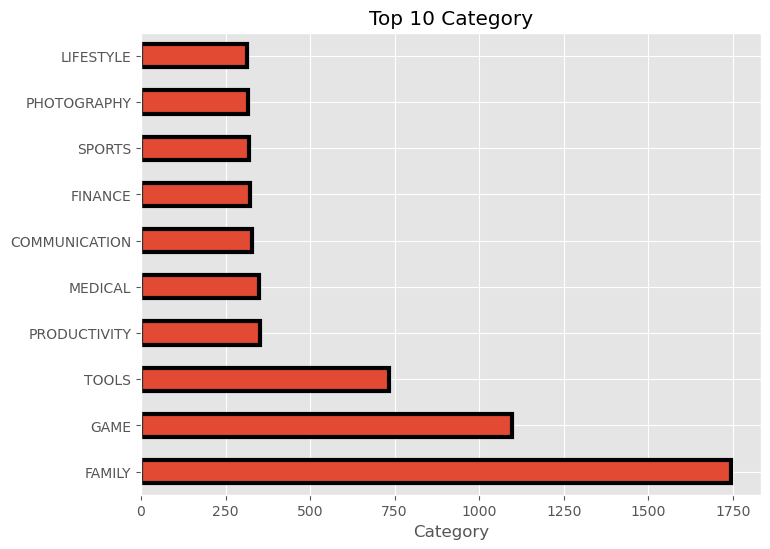

In [39]:
top_10 = df["Category"].value_counts().head(10)

top_10.plot(kind='barh',
           title='Top 10 Category',
           figsize=(8,6),
           edgecolor='black',
           linewidth=3)
plt.xlabel('Category')

### 2. Visualize the Types of Apps
* There are only two types of apps, so we choose to use bar chart.

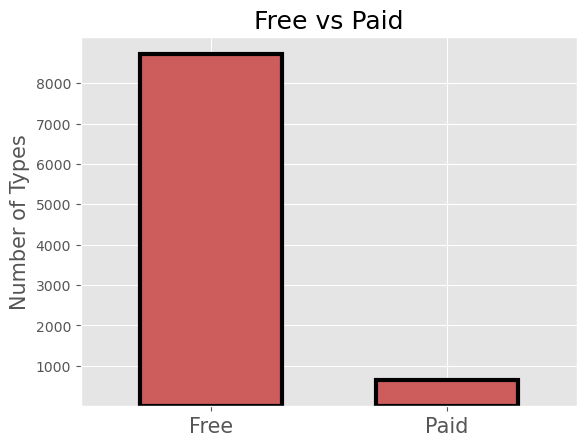

In [40]:
type_count = df["Type"].value_counts()
type_count.plot(kind="bar", 
                color="#CD5C5C", 
                width=0.6,
               edgecolor='black',
               linewidth=3)
plt.title("Free vs Paid", fontsize=18)
plt.xticks(rotation=0, fontsize=15)
plt.ylabel("Number of Types", fontsize=15)
plt.yticks([1000,2000,3000,4000,5000,6000,7000,8000])
plt.show()

###  3. Visualize Paid Apps
* We choose to use **`boxplot`** to visualize to help us get the visual summary of the variability of dataset, spot outliers and distributions.

<AxesSubplot:title={'center':'Apps Price in UK'}, xlabel='Price in UK'>

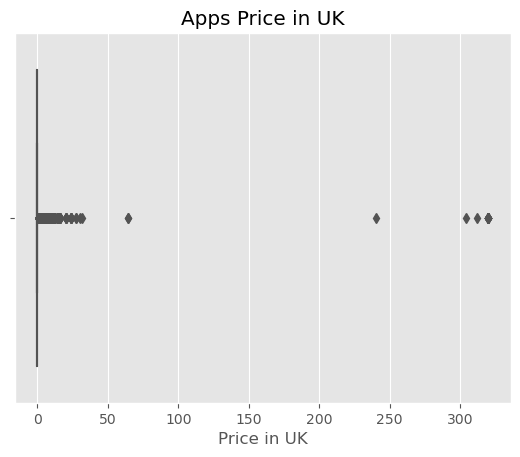

In [41]:
plt.title("Apps Price in UK")
sns.boxplot(data=df, x="Price in UK")

### 4. Visualize the Countent Rating
* There a few of items, so we choose to use pie chart

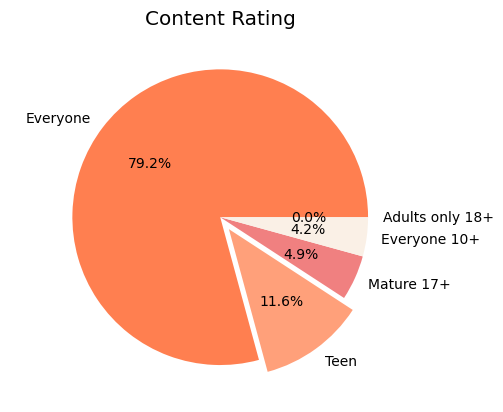

In [42]:
colors = ['coral','lightsalmon','lightcoral','linen','linen']
content_rating = df["Content Rating"].value_counts()
content_rating.plot(kind="pie", 
                    title="Content Rating",
                    colors = colors,
                   autopct="%1.1f%%",
                   explode=(0,0.1,0,0,0))
plt.ylabel(" ")
plt.show()

### 5. Visualize Rating

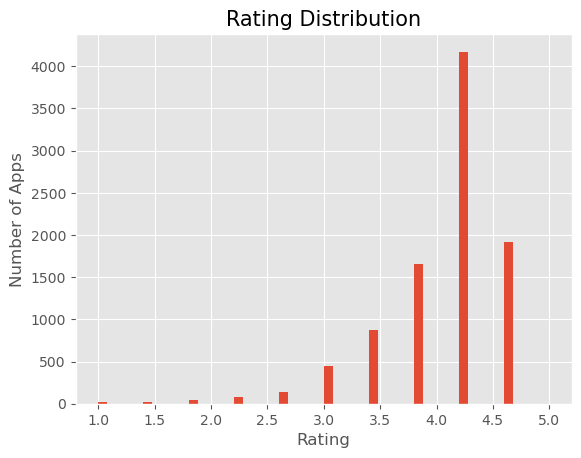

In [45]:
df["Rating"].plot.hist(width=0.08)
plt.title("Rating Distribution", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.show()

### 6. Visualize Content Rating and Type
* In this part, we combine factors of Content Rating and Types of app together for visualization

<AxesSubplot:xlabel='Content Rating', ylabel='Count'>

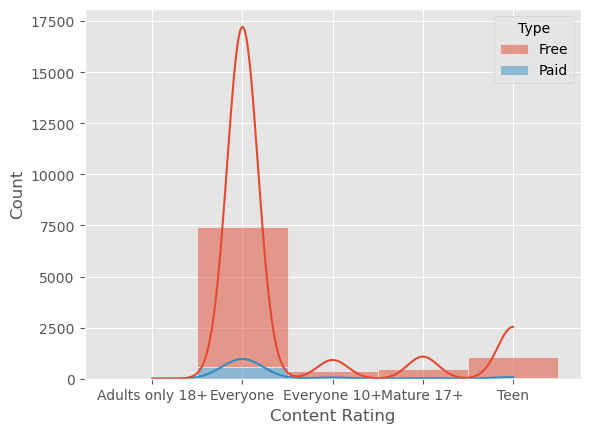

In [46]:
sns.histplot(data=df, 
             x="Content Rating", 
             hue="Type", 
             multiple="stack",
             kde=True)

### 7. Visualize Type and Rating

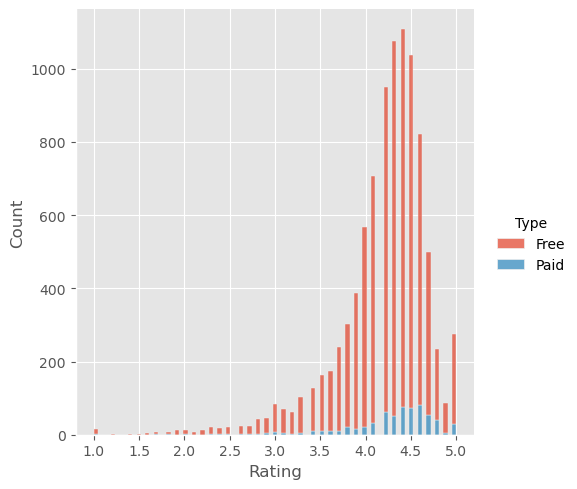

In [49]:
sns.displot(kind="hist",
           data=df,
           x="Rating",
           hue="Type",
           multiple="stack")

### 8. Visualize Content Rating, Type and Rating

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

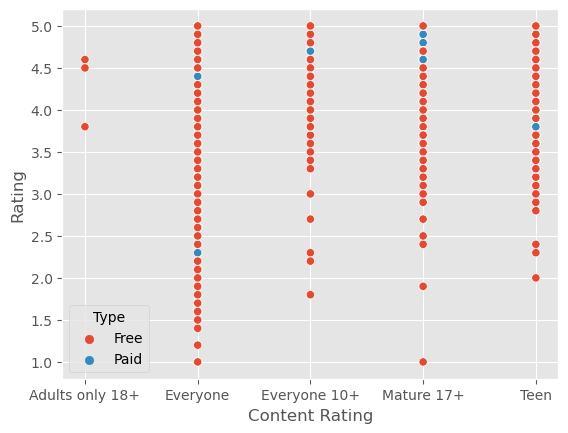

In [44]:
sns.scatterplot(data=df, 
             x="Content Rating", 
             hue="Type", 
             y="Rating")

### 9. Visualize the relationship between Rating and Categories; Price and Categories

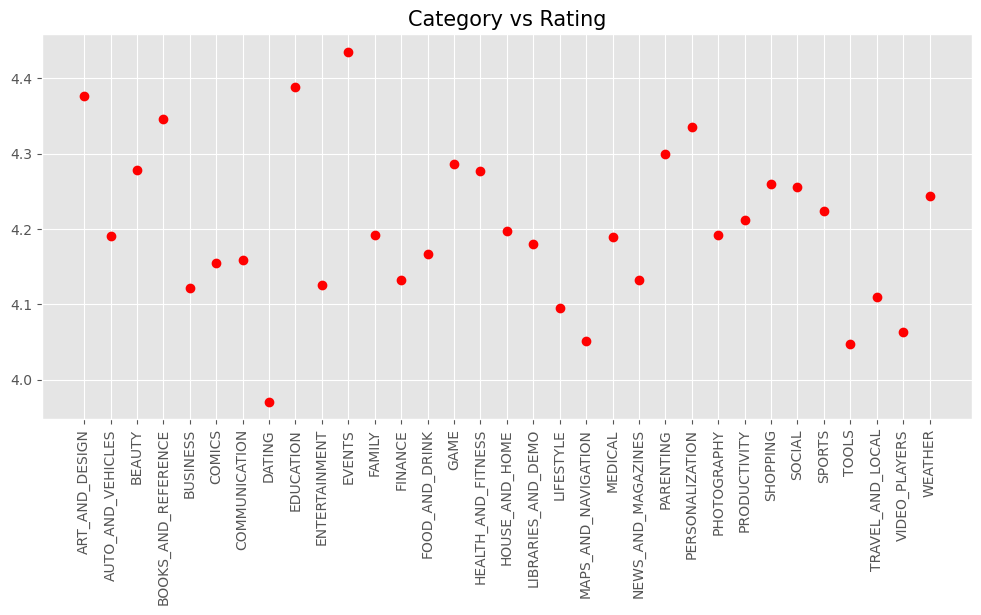

In [50]:
grp = df.groupby('Category')
x = grp["Rating"].agg(np.mean)
y = grp["Price in UK"].agg(np.mean)

plt.figure(figsize=(12,5))
plt.title("Category vs Rating", fontsize=15)
plt.plot(x, "ro")
plt.xticks(rotation=90)
plt.show()

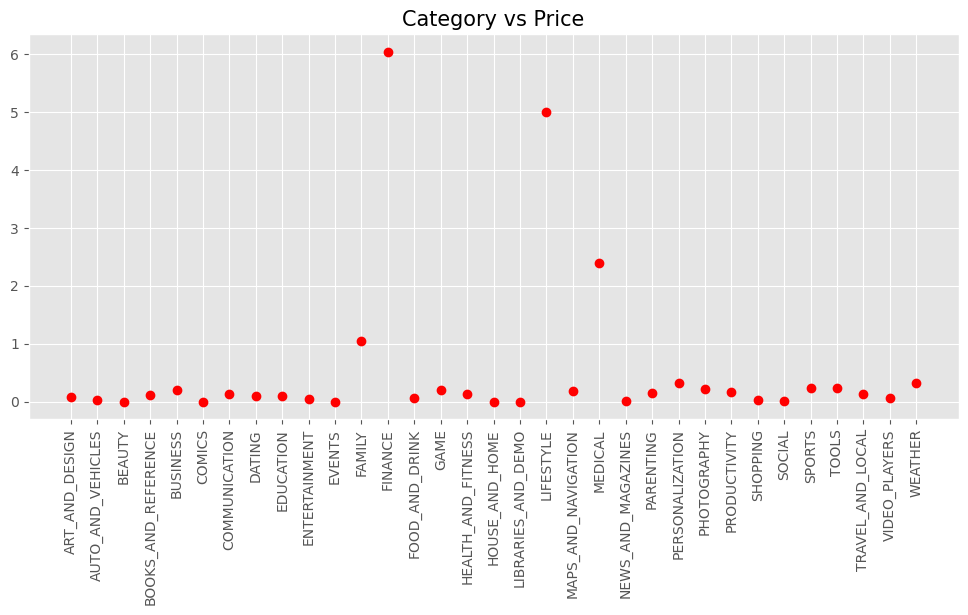

In [51]:
plt.figure(figsize=(12,5))
plt.title("Category vs Price", fontsize=15)
plt.plot(y, "ro")
plt.xticks(rotation=90)
plt.show()